<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="../../logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Aufgabe 4.4 – Ableitung und Genauigkeit

In dieser Übungsaufgabe werden Sie 2 Näherungen der 1. Ableitung einer Funktion implementieren und deren Genauigkeit analysieren.

## Aufgabenteil A

Schreiben Sie die Funktion`ableitung_o1(funk, x, h)`, die für eine beliebige übergebene Funktion die 1. Ableitung 1. Ordnung der Funktion an allen Stellen des Arrays x berechnet und das Ergebnis als Array wieder zurück gibt. Sie können Funktionen wie Variablen übergeben und dann mit dem zugewiesenen Namen, hier `funk`, auf diese zugreifen.

Schreiben Sie zusätzlich eine Funktion `ableitung_02(funk, x, h)`, die die Ableitung 2. Ordnung berechnet.

### Lösungsvorschlag

In [9]:
import numpy as np

def ableitung_o1(funk, x, h):
    dy = []
    y = funk(x)
    yh_pos = funk(x + h)
    for i in range(len(x)):
        dy.append((yh_pos[i]-y[i])/h)
    return dy

def ableitung_o2(funk, x, h):
    dy = []
    yh_pos = funk(x + h)
    yh_neg = funk(x - h)
    for i in range(len(x)):
        dy.append((yh_pos[i]-yh_neg[i])/2/h)
    return dy

## Aufgabenteil B

Schreiben Sie eine Funktion, die ein Array entegen nimmt, die Funktion
$f(x) = x^3 +2x^2$
auf jedes Element des Arrays anwendet und alle berechneten Werte wieder als Array zurück gibt.

Berechnen Sie analytisch die Ableitung der Funktion $f(x)$ und implementieren Sie diese nach dem gleichen Prinzip.

### Lösungsvorschlag

In [10]:
def f(x):
    return x**3 + 2*x**2

def df(x):
    return 3*x**2 + 4*x

## Aufgabenteil C

Schreiben Sie ein Programm, welches die Genauigkeit der numerischen Lösungen mit der analytischen vergleicht. Werten Sie dazu alle drei Ableitungsfunktionen an jeweils 10 beliebigen Stellen für alle $h \in \{1, 10^{-1}, 10^{-2}, ..., 10^{-15}\}$ aus. Bestimmen Sie die Differenzen zwischen der analytischen Lösung und den numerischen und bilden Sie immer den Mittelwert über die 10 Stellen. Plotten Sie die Differenzen doppelt logaritmisch gegen $h$.

### Lösungsvorschlag

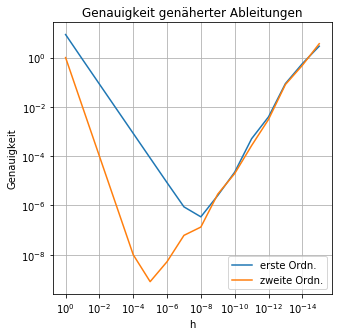

In [11]:
import matplotlib.pyplot as plt

x = np.linspace(-5,5,10)
h = []
num_abl1 = np.ndarray((16, 10))
num_abl2 = np.ndarray((16, 10))

for i in range(16):
    h.append(10**-i)
    num_abl1[i] = ableitung_o1(f, x, h[i])
    num_abl2[i] = ableitung_o2(f, x, h[i])
    
ana_abl = df(x)
diff1 = np.abs(num_abl1 - ana_abl)
diff2 = np.abs(num_abl2 - ana_abl)

diff1 = np.mean(diff1, axis=1)
diff2 = np.mean(diff2, axis=1)

plt.figure(figsize=(5,5))

ax = plt.gca()
ax.invert_xaxis()

plt.loglog(h, diff1, label='erste Ordn.')
plt.loglog(h, diff2, label='zweite Ordn.')

plt.title('Genauigkeit genäherter Ableitungen')
plt.xlabel('h')
plt.ylabel('Genauigkeit')
plt.grid()
plt.legend()

plt.show()

## Aufgabenteil D

1. Was zeigt der Plot? 
1. Wieso wird die Genauigkeit ab einem bestimmten Punkt für kleinere h wieder schlechter? 

### Lösungshinweis

zu 2.:<br> Erinnern Sie sich daran, dass Gleitkommazahlen in der Regel gerundet sind und selbst nur eine begrenzte Genauigkeit aufweisen. Diese Genauigkeit liegt bei c.a. $10^{-15}$. Wieso macht sie sich schon bei vergleichsweise großen $h$ bemerkbar? Schauen Sie sich die Formeln nochmal genau an.

### Lösungsvorschlag

1. Der Plot zeigt, wie für kleinere $h$ sich die Genauigkeit der genäherten Ableitungen bis zu einem gewissen Punkt verbessert und dann wieder verschlechtert. Die Ableitung 2. Ordnung ist, für gleiche $h$, immer Genauer als die 1. Ordnung und erreicht maximale Genauigkeit ungefähr für $h=10^{-5}$ während die Ableitung 2. Ordnung maximale Genauigkeit bei ungefähr $h=10^{-8}$ erreicht.
1. Das die Genauigkeit mit kleineren $h$ Werten steigt war erwartet, da die benutzten Formeln $\mathcal{O}(h)$ und $\mathcal{O}(h^2)$ haben. Das Problem liegt darin, dass zwei fast gleich große Zahlen voneinander subtrahiert werden. Dies resultiert in einem Verlust an Genauigkeit, der ab einem gewissen Punkt den Ganauigkeitsgewinn durch das Verkleinern von $h$ überwiegt.